In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
train = pd.read_csv("cup98ID.shuf.5000.train.csv", low_memory=False)

In [3]:
train.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_B,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,9501,ARG,0,TX,79329,,,4401,0,,...,0,0,L,3,G,X,X,X,56.0,C
1,9401,AML,1,OK,74135,,,3901,0,,...,0,0,L,4,E,X,X,X,32.0,B
2,9401,ARG,0,NV,89117,,,0,1,,...,0,0,L,1,F,X,X,X,20.0,B
3,9601,IWD,1,MI,48813,,,5401,0,,...,0,0,L,1,F,X,X,X,37.0,B
4,9401,SYN,1,CA,94070,,,0,0,,...,0,0,L,2,F,X,X,X,2.0,A


In [60]:
train.describe()

C:\Users\adukkon\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,HPHONE_D,RFA_2F,CLUSTER2
count,2500.000000,2500.000000,2500.000000,1864.000000,348.000000,1960.000000,1327.000000,2500.000000,1095.000000,1095.000000,...,2500.000000,2500.000000,2228.000000,2228.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2494.000000
mean,9155.091600,86.978000,2724.475200,61.297747,1.436782,3.906122,5.401658,2.917200,0.132420,0.043836,...,9548.191200,9147.354400,9160.595601,7.878366,13.666778,96181.581600,0.051600,0.490400,1.898800,30.883721
std,343.118534,1307.083585,2142.045026,16.570248,0.699133,1.847245,2.750965,6.303764,0.435826,0.237860,...,50.111635,316.265215,296.100836,6.147346,9.782692,55759.158499,0.221262,0.500008,1.067059,18.736763
min,8306.000000,0.000000,0.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,9503.000000,8306.000000,8309.000000,0.000000,2.000000,88.000000,0.000000,0.000000,1.000000,1.000000
25%,8901.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,9509.000000,8903.000000,NaN,NaN,8.468326,46317.500000,0.000000,0.000000,1.000000,NaN
50%,9201.000000,1.000000,2703.500000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,9512.000000,9203.000000,NaN,NaN,11.878676,97099.500000,0.000000,0.000000,1.000000,NaN
75%,9501.000000,2.000000,4508.250000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,...,9602.000000,9410.000000,NaN,NaN,16.262500,145408.250000,0.000000,1.000000,3.000000,NaN
max,9601.000000,39002.000000,7810.000000,98.000000,4.000000,7.000000,9.000000,66.000000,5.000000,2.000000,...,9702.000000,9603.000000,9702.000000,45.000000,277.500000,191588.000000,1.000000,1.000000,4.000000,62.000000


In [4]:
len(train.columns)

480

In [5]:
len(train)

2500

### Remove NaN values

In [106]:
dropped["PVASTATE"].nunique()
dropped["PVASTATE"].value_counts()

     2458
P      42
Name: PVASTATE, dtype: int64

In [120]:
train = train.replace(r'\s+', np.nan, regex=True)

In [122]:
train.isnull().mean()

ODATEDW     0.0000
OSOURCE     0.0108
TCODE       0.0000
STATE       0.0000
ZIP         0.0000
MAILCODE    0.9816
PVASTATE    0.9832
DOB         0.0000
NOEXCH      0.0000
RECINHSE    0.9316
RECP3       0.9780
RECPGVG     0.9976
RECSWEEP    0.9816
MDMAUD      0.0000
DOMAIN      0.0292
CLUSTER     0.0292
AGE         0.2544
AGEFLAG     0.3040
HOMEOWNR    0.2288
CHILD03     0.9904
CHILD07     0.9848
CHILD12     0.9772
CHILD18     0.9708
NUMCHLD     0.8608
INCOME      0.2160
GENDER      0.0268
WEALTH1     0.4692
HIT         0.0000
MBCRAFT     0.5620
MBGARDEN    0.5620
             ...  
RAMNT_19    0.8444
RAMNT_20    0.9268
RAMNT_21    0.9048
RAMNT_22    0.7676
RAMNT_23    0.9140
RAMNT_24    0.8156
RAMNTALL    0.0000
NGIFTALL    0.0000
CARDGIFT    0.0000
MINRAMNT    0.0000
MINRDATE    0.0000
MAXRAMNT    0.0000
MAXRDATE    0.0000
LASTGIFT    0.0000
LASTDATE    0.0000
FISTDATE    0.0000
NEXTDATE    0.1088
TIMELAG     0.1088
AVGGIFT     0.0000
CONTROLN    0.0000
TARGET_B    0.0000
HPHONE_D    

In [123]:
train = train.loc[:, train.isnull().mean() < .8]

In [124]:
train.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,DOB,NOEXCH,MDMAUD,DOMAIN,CLUSTER,...,TARGET_B,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,9501,ARG,0,TX,79329,4401,0,XXXX,R2,44,...,0,0,L,3,G,X,X,X,56.0,C
1,9401,AML,1,OK,74135,3901,0,XXXX,C1,24,...,0,0,L,4,E,X,X,X,32.0,B
2,9401,ARG,0,NV,89117,0,1,XXXX,S1,11,...,0,0,L,1,F,X,X,X,20.0,B
3,9601,IWD,1,MI,48813,5401,0,XXXX,T2,39,...,0,0,L,1,F,X,X,X,37.0,B
4,9401,SYN,1,CA,94070,0,0,XXXX,S1,11,...,0,0,L,2,F,X,X,X,2.0,A


-------

### Remove highly correlated columns

In [125]:
corr_matrix = train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

In [126]:
dropped = train.drop(to_drop, axis=1)

In [127]:
dropped.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,DOB,NOEXCH,MDMAUD,DOMAIN,CLUSTER,...,TARGET_B,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,9501,ARG,0,TX,79329,4401,0,XXXX,R2,44,...,0,0,L,3,G,X,X,X,56.0,C
1,9401,AML,1,OK,74135,3901,0,XXXX,C1,24,...,0,0,L,4,E,X,X,X,32.0,B
2,9401,ARG,0,NV,89117,0,1,XXXX,S1,11,...,0,0,L,1,F,X,X,X,20.0,B
3,9601,IWD,1,MI,48813,5401,0,XXXX,T2,39,...,0,0,L,1,F,X,X,X,37.0,B
4,9401,SYN,1,CA,94070,0,0,XXXX,S1,11,...,0,0,L,2,F,X,X,X,2.0,A


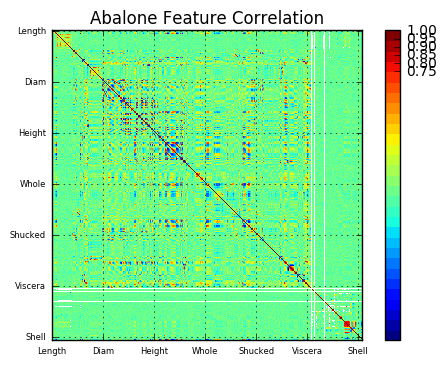

In [128]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(dropped)

In [130]:
train["TARGET_B"].nunique()

2

In [131]:
train["TARGET_B"].value_counts()

0    2371
1     129
Name: TARGET_B, dtype: int64

In [134]:
train[train["TARGET_B"] == 1]

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,DOB,NOEXCH,MDMAUD,DOMAIN,CLUSTER,...,TARGET_B,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
14,8901,UCA,28,MI,48198,5601,0,XXXX,C2,27,...,1,0,L,4,E,X,X,X,21.0,A
27,9601,SYN,0,CA,90630,0,0,XXXX,S1,14,...,1,0,L,1,F,X,X,X,8.0,A
63,9501,L15,1,CA,90746,4901,0,XXXX,S2,18,...,1,0,L,1,G,X,X,X,5.0,A
93,8601,AMB,2,LA,70665,2501,0,XXXX,T2,39,...,1,0,L,1,E,X,X,X,53.0,C
116,8901,MCC,2,IL,60629,3504,0,XXXX,U3,08,...,1,1,L,1,F,X,X,X,31.0,A
163,8801,NaN,0,MI,49008,2501,0,XXXX,C1,24,...,1,1,L,1,F,X,X,X,11.0,C
239,9001,PV3,1,AZ,86427,2103,0,XXXX,R2,49,...,1,1,L,2,F,X,X,X,59.0,C
240,9101,HAN,1,GA,30092,5509,0,XXXX,S1,14,...,1,1,L,3,F,X,X,X,5.0,A
311,8601,LIS,2,MO,64133,1102,0,XXXX,C2,28,...,1,1,L,2,E,X,X,X,35.0,B
327,9401,AML,28,IN,46228,1601,0,XXXX,S1,11,...,1,1,L,1,F,X,X,X,4.0,B


In [136]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(dropped)

ValueError: could not convert string to float: 'A'